In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# we used google colab to to train our model therefore i can not change the paths
# I would need to download big sized libraries in order to run this notebook
# if you would like to test this notebook please configure the paths

In [ ]:
# link below is our work on colab and should work without needing the changed paths

#https://colab.research.google.com/drive/1nmblWYCxaoQb7_d1nEfQLKzdQXFvh6aF?usp=sharing

In [2]:
df = pd.read_csv('/content/drive/MyDrive/hateval2019/hateval2019_en_train.csv')
df

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0
...,...,...,...,...,...
8995,9196,@mmdwriter @JRubinBlogger @BenSasse I am proud...,0,0,0
8996,9197,@CheriJacobus Hollywood is complicit in the ra...,0,0,0
8997,9198,@amaziah_filani What a fucking cunt I hate see...,1,1,1
8998,9199,Hysterical woman like @CoryBooker,0,0,0


In [3]:
df['text'][0]

'Hurray, saving us $$$ in so many ways @potus @realDonaldTrump #LockThemUp #BuildTheWall #EndDACA #BoycottNFL #BoycottNike'

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
vocab_size = 5000 # make the top list of words (common words)
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # OOV = Out of Vocabulary
training_portion = .8

In [6]:
texts = []
labels = []

with open("/content/drive/MyDrive/hateval2019/hateval2019_en_train.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    punctuation='@/\,;.:!?$123456789¿¡'
    table=str.maketrans(dict.fromkeys(punctuation))

    next(reader)
    for row in reader:
        labels.append(row[2])
        text = row[1].lower()
        text = text.translate(table)
        for word in STOPWORDS:
            token = ' ' + word + ' '
            text = text.replace(token, ' ')
            text = text.replace(' ', ' ')
        texts.append(text)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.10, random_state=42)

y_train = np.array(y_train, dtype=np.int)
y_test = np.array(y_test, dtype=np.int)

In [8]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index


In [9]:
train_sequences = tokenizer.texts_to_sequences(X_train)


In [10]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
train_padded.shape

(8100, 200)

In [11]:

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [12]:
# printing shapes of our objects

print('train padded x shape = ', train_padded.shape)
print('test padded x shape = ', test_padded.shape)
print('train padded y shape = ', y_train.shape)
print('test padded y shape = ', y_test.shape)

train padded x shape =  (8100, 200)
test padded x shape =  (900, 200)
train padded y shape =  (8100,)
test padded y shape =  (900,)


In [13]:
model_bidirectionalLSTM = Sequential()

model_bidirectionalLSTM.add(Embedding(vocab_size, embedding_dim))
model_bidirectionalLSTM.add(Dropout(0.1))
model_bidirectionalLSTM.add(Bidirectional(LSTM(embedding_dim)))
model_bidirectionalLSTM.add(Dense(1, activation= 'sigmoid'))

model_bidirectionalLSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 386,177
Trainable params: 386,177
Non-trainable params: 0
_________________________________________________________________


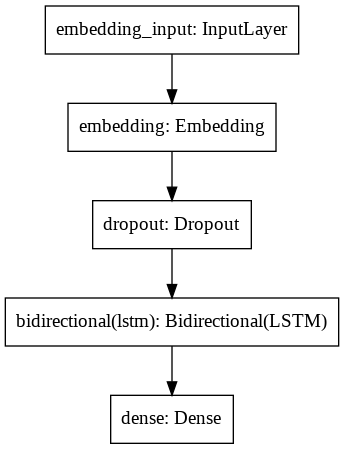

In [14]:
keras.utils.plot_model(model_bidirectionalLSTM)

In [15]:
model_bidirectionalLSTM.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [16]:
num_epochs = 10
history_bidrectional = model_bidirectionalLSTM.fit(train_padded, y_train, epochs=num_epochs, validation_data=(test_padded, y_test), verbose=1)


Epoch 1/10
254/254 [==============================] - 41s 152ms/step - loss: 0.6183 - accuracy: 0.6489 - val_loss: 0.4585 - val_accuracy: 0.7978
Epoch 2/10
254/254 [==============================] - 39s 152ms/step - loss: 0.3664 - accuracy: 0.8347 - val_loss: 0.4816 - val_accuracy: 0.7789
Epoch 3/10
254/254 [==============================] - 39s 152ms/step - loss: 0.2865 - accuracy: 0.8806 - val_loss: 0.5056 - val_accuracy: 0.7744
Epoch 4/10
254/254 [==============================] - 38s 151ms/step - loss: 0.2198 - accuracy: 0.9144 - val_loss: 0.5876 - val_accuracy: 0.7700
Epoch 5/10
254/254 [==============================] - 38s 152ms/step - loss: 0.1581 - accuracy: 0.9418 - val_loss: 0.6848 - val_accuracy: 0.7556
Epoch 6/10
254/254 [==============================] - 39s 153ms/step - loss: 0.1246 - accuracy: 0.9543 - val_loss: 0.8200 - val_accuracy: 0.7544
Epoch 7/10
254/254 [==============================] - 38s 151ms/step - loss: 0.0949 - accuracy: 0.9690 - val_loss: 0.9314 - val_ac

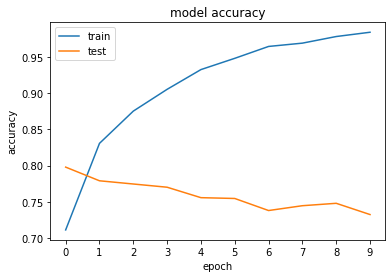

In [41]:
plt.plot(history_bidrectional.history['accuracy'])
plt.plot(history_bidrectional.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(0,10,1))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [19]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [20]:
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(max_length,))
embedding_layer = TokenAndPositionEmbedding(max_length, vocab_size, embedding_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embedding_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_tranformer = keras.Model(inputs=inputs, outputs=outputs)

In [21]:
model_tranformer.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history_transformer = model_tranformer.fit(train_padded, y_train, batch_size=32, epochs=10, validation_data=(test_padded, y_test))

Epoch 1/10
254/254 [==============================] - 36s 138ms/step - loss: 0.7005 - accuracy: 0.5510 - val_loss: 0.6770 - val_accuracy: 0.5844
Epoch 2/10
254/254 [==============================] - 35s 136ms/step - loss: 0.6537 - accuracy: 0.6128 - val_loss: 0.4755 - val_accuracy: 0.7678
Epoch 3/10
254/254 [==============================] - 35s 137ms/step - loss: 0.4307 - accuracy: 0.8032 - val_loss: 0.4894 - val_accuracy: 0.7844
Epoch 4/10
254/254 [==============================] - 35s 137ms/step - loss: 0.3578 - accuracy: 0.8410 - val_loss: 0.5046 - val_accuracy: 0.7578
Epoch 5/10
254/254 [==============================] - 35s 136ms/step - loss: 0.3153 - accuracy: 0.8577 - val_loss: 0.5275 - val_accuracy: 0.7578
Epoch 6/10
254/254 [==============================] - 35s 137ms/step - loss: 0.2620 - accuracy: 0.8883 - val_loss: 0.5956 - val_accuracy: 0.7344
Epoch 7/10
254/254 [==============================] - 35s 136ms/step - loss: 0.2168 - accuracy: 0.9109 - val_loss: 0.6819 - val_ac

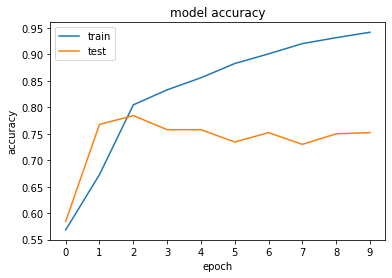

In [38]:
plt.plot(history_transformer.history['accuracy'])
plt.plot(history_transformer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(10))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
model_tranformer.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
token_and_position_embedding (None, 200, 64)           332800    
_________________________________________________________________
transformer_block (Transform (None, 200, 64)           37664     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1300      
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0     

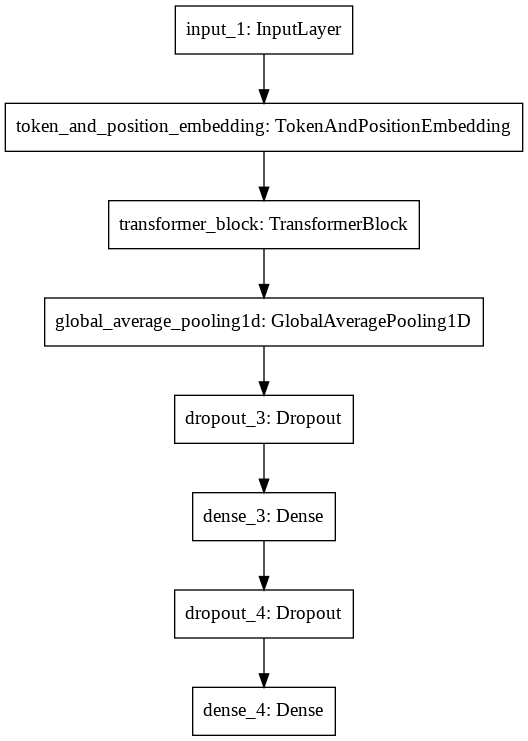

In [24]:
keras.utils.plot_model(model_tranformer)

In [25]:
rnn_model = Sequential()
#rnn_model.add(layers.Input(shape=(max_length,)))
#rnn_model.add(TokenAndPositionEmbedding(max_length, vocab_size, embedding_dim))
rnn_model.add(Embedding(vocab_size, embedding_dim))
rnn_model.add(layers.LSTM(units=64, activation='tanh', return_sequences=True))
rnn_model.add(layers.LSTM(units=64, activation='tanh', return_sequences=True))
rnn_model.add(Dropout(0.1))
#rnn_model.add(Flatten())
rnn_model.add(Dense(units=1, activation='sigmoid'))
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
dense_5 (Dense)              (None, None, 1)           65        
Total params: 386,113
Trainable params: 386,113
Non-trainable params: 0
_________________________________________________________________


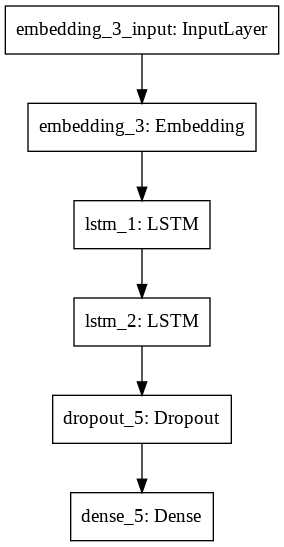

In [26]:
keras.utils.plot_model(rnn_model)

In [27]:
history_lstm = rnn_model.fit(train_padded, y_train, batch_size=32, epochs=10, validation_data=(test_padded, y_test))

Epoch 1/10
254/254 [==============================] - 48s 178ms/step - loss: 0.6836 - accuracy: 0.5775 - val_loss: 0.5785 - val_accuracy: 0.7596
Epoch 2/10
254/254 [==============================] - 46s 182ms/step - loss: 0.5375 - accuracy: 0.7615 - val_loss: 0.5541 - val_accuracy: 0.7430
Epoch 3/10
254/254 [==============================] - 45s 179ms/step - loss: 0.4603 - accuracy: 0.8079 - val_loss: 0.5451 - val_accuracy: 0.7523
Epoch 4/10
254/254 [==============================] - 45s 177ms/step - loss: 0.4081 - accuracy: 0.8453 - val_loss: 0.5495 - val_accuracy: 0.7570
Epoch 5/10
254/254 [==============================] - 45s 177ms/step - loss: 0.3910 - accuracy: 0.8537 - val_loss: 0.5446 - val_accuracy: 0.7581
Epoch 6/10
254/254 [==============================] - 44s 174ms/step - loss: 0.3621 - accuracy: 0.8665 - val_loss: 0.5915 - val_accuracy: 0.7526
Epoch 7/10
254/254 [==============================] - 44s 175ms/step - loss: 0.3757 - accuracy: 0.8662 - val_loss: 0.5774 - val_ac

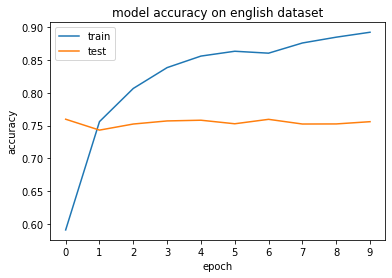

In [28]:
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('model accuracy on english dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(10))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

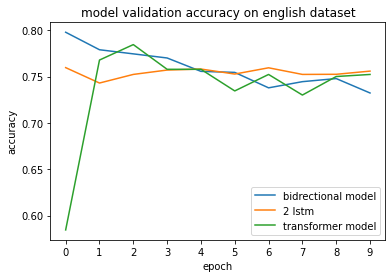

In [42]:
plt.plot(history_bidrectional.history['val_accuracy'], label='bidrectional model')
plt.plot(history_lstm.history['val_accuracy'], label= '2 lstm')
plt.plot(history_transformer.history['val_accuracy'], label = 'transformer model')
plt.xticks(np.arange(10))
plt.title('model validation accuracy on english dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()

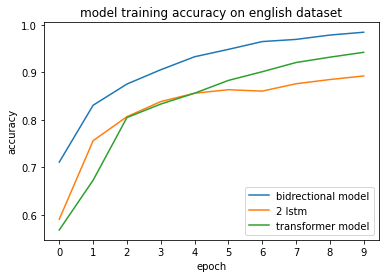

In [33]:
plt.plot(history_bidrectional.history['accuracy'], label='bidrectional model')
plt.plot(history_lstm.history['accuracy'], label= '2 lstm')
plt.plot(history_transformer.history['accuracy'], label = 'transformer model')
plt.xticks(np.arange(10))
plt.title('model training accuracy on english dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

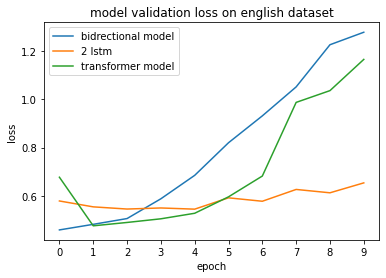

In [37]:
plt.plot(history_bidrectional.history['val_loss'], label='bidrectional model')
plt.plot(history_lstm.history['val_loss'], label= '2 lstm')
plt.plot(history_transformer.history['val_loss'], label = 'transformer model')
plt.xticks(np.arange(10))
plt.title('model validation loss on english dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

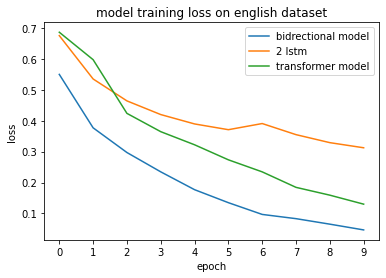

In [36]:
plt.plot(history_bidrectional.history['loss'], label='bidrectional model')
plt.plot(history_lstm.history['loss'], label= '2 lstm')
plt.plot(history_transformer.history['loss'], label = 'transformer model')
plt.xticks(np.arange(10))
plt.title('model training loss on english dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()